In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Hello\Desktop\winequality-red.csv")

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
data['quality']=[1 if i>6.5
                else 0
                for i in data['quality']]

In [10]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [11]:
import seaborn as sns

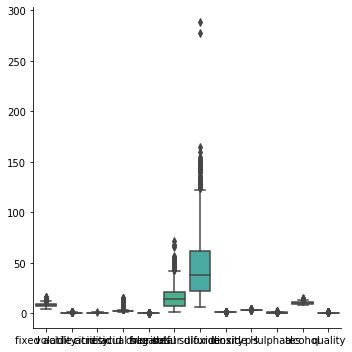

In [12]:
sns.catplot(kind='box',data=data,height=5)

##### splitting input and output

In [13]:
x=data.drop(['quality'],axis=1)

In [14]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [15]:
x.shape

(1599, 11)

In [16]:
y=data['quality']

In [17]:
y.shape

(1599,)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [20]:
x_train.shape


(1279, 11)

In [21]:
y_test.shape

(320,)

#### importing machine learning libraries

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
knn=KNeighborsClassifier(n_neighbors=1,leaf_size=1)

In [24]:
knn=knn.fit(x_train,y_train)

In [25]:
knn_pred=knn.predict(x_test)

In [26]:
knn_cm=confusion_matrix(knn_pred,y_test)

In [27]:
knn_cm

array([[262,  22],
       [ 17,  19]], dtype=int64)

In [28]:
knn_ac=accuracy_score(knn_pred,y_test)

In [29]:
knn_ac

0.878125

In [30]:
print('Train accuracy :',knn.score(x_train, y_train))
print('Test accuracy  :',knn.score(x_test, y_test))

Train accuracy : 1.0
Test accuracy  : 0.878125


ROC_AUC Score : 0.7012413672523822


<function matplotlib.pyplot.show(*args, **kw)>

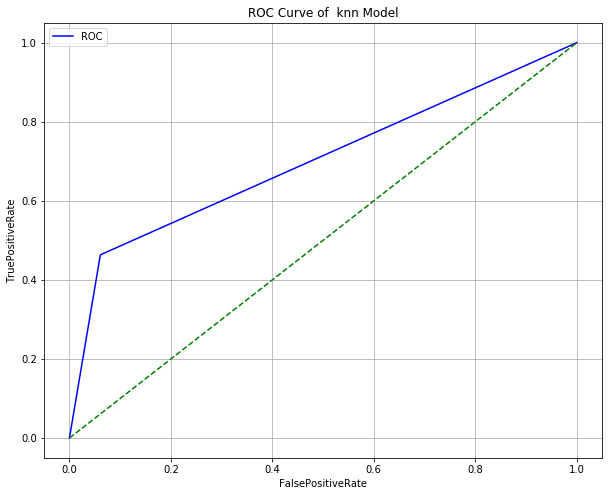

In [31]:
print("ROC_AUC Score :",roc_auc_score(y_test, knn_pred))

fpr,tpr,thresholds=roc_curve(y_test, knn_pred)
plt.figure(figsize=(10,8),)
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.title('ROC Curve of  knn Model')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid()
plt.legend()
plt.show

### naive bayes

In [32]:
nb=GaussianNB()

In [33]:
nb=nb.fit(x_train,y_train)

In [34]:
nb_pred=nb.predict(x_test)

In [35]:
nb_cm=confusion_matrix(nb_pred,y_test)

In [36]:
nb_cm

array([[229,  14],
       [ 50,  27]], dtype=int64)

In [37]:
nb_ac=accuracy_score(nb_pred,y_test)

In [38]:
nb_ac

0.8

In [39]:
print('Train accuracy :',nb.score(x_train, y_train))
print('Test accuracy  :',nb.score(x_test, y_test))

Train accuracy : 0.8405003909304144
Test accuracy  : 0.8


ROC_AUC Score : 0.7396625579159017


<function matplotlib.pyplot.show(*args, **kw)>

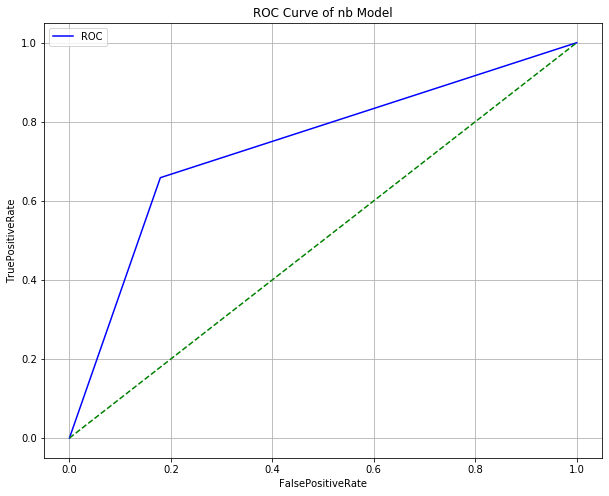

In [40]:
print("ROC_AUC Score :",roc_auc_score(y_test, nb_pred))

fpr,tpr,thresholds=roc_curve(y_test, nb_pred)
plt.figure(figsize=(10,8),)
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.title('ROC Curve of nb Model')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid()
plt.legend()
plt.show

#### svc

In [41]:
svm=SVC()

In [42]:
svm=svm.fit(x_train,y_train)

In [43]:
svm_pred=svm.predict(x_test)

In [44]:
svm_cm=confusion_matrix(svm_pred,y_test)

In [45]:
svm_ac=accuracy_score(svm_pred,y_test)

In [46]:
svm_ac

0.871875

In [47]:
print('Train accuracy :',svm.score(x_train, y_train))
print('Test accuracy  :',svm.score(x_test, y_test))

Train accuracy : 0.8623924941360438
Test accuracy  : 0.871875


ROC_AUC Score : 0.5


<function matplotlib.pyplot.show(*args, **kw)>

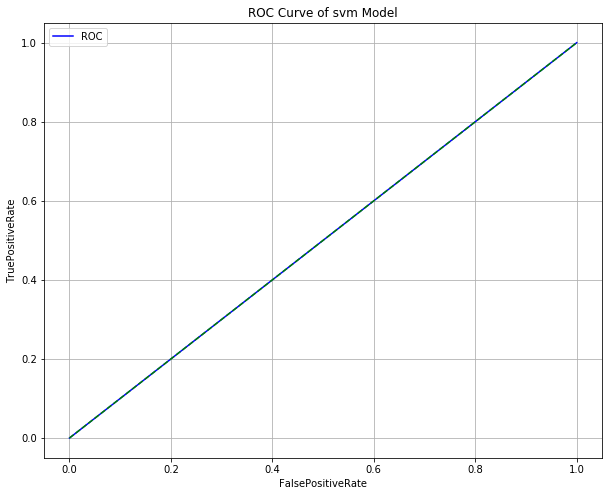

In [48]:
print("ROC_AUC Score :",roc_auc_score(y_test, svm_pred))

fpr,tpr,thresholds=roc_curve(y_test, svm_pred)
plt.figure(figsize=(10,8),)
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.title('ROC Curve of svm Model')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid()
plt.legend()
plt.show

#### logistic regression

In [49]:
lr=LogisticRegression()

In [50]:
lr=lr.fit(x_train,y_train)

In [51]:
lr_pred=lr.predict(x_test)

In [52]:
lr_cm=confusion_matrix(lr_pred,y_test)

In [53]:
lr_ac=accuracy_score(lr_pred,y_test)

In [54]:
lr_ac

0.890625

In [55]:
print('train accuracy : ',lr.score(x_train,y_train))
print('test accuracy : ', lr.score(x_train,y_train))

train accuracy :  0.8780297107114934
test accuracy :  0.8780297107114934


ROC_AUC Score : 0.6667977970102281


<function matplotlib.pyplot.show(*args, **kw)>

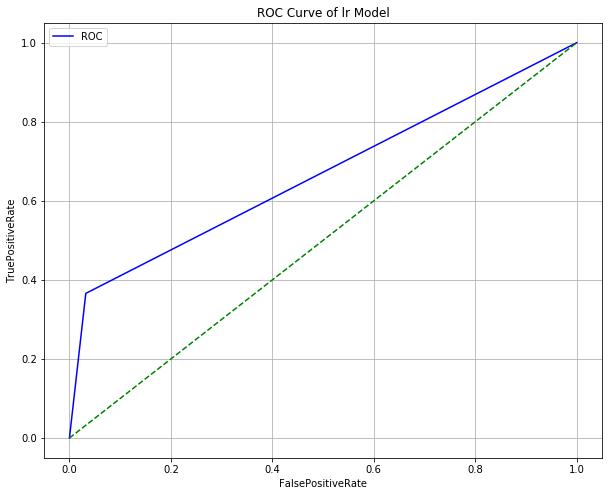

In [56]:
print("ROC_AUC Score :",roc_auc_score(y_test, lr_pred))

fpr,tpr,thresholds=roc_curve(y_test, lr_pred)
plt.figure(figsize=(10,8),)
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.title('ROC Curve of lr Model')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid()
plt.legend()
plt.show

#### decisiontree

In [57]:
dt=DecisionTreeClassifier(criterion='entropy')

In [58]:
dt=dt.fit(x_train,y_train)

In [59]:
dt_pred=dt.predict(x_test)

In [60]:
dt_cm=confusion_matrix(dt_pred,y_test)

In [61]:
dt_ac=accuracy_score(dt_pred,y_test)

In [62]:
dt_ac

0.8875

In [63]:
print('Train accuracy :',dt.score(x_train,y_train))
print('test accuracy : ', dt.score(x_train,y_train))

Train accuracy : 1.0
test accuracy :  1.0


ROC_AUC Score : 0.7690357548736778


<function matplotlib.pyplot.show(*args, **kw)>

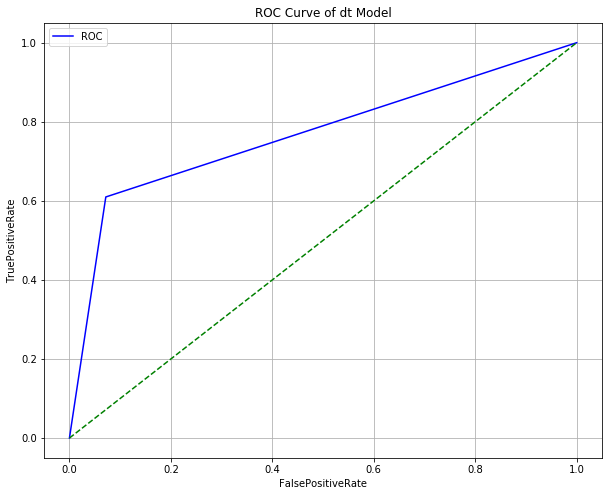

In [64]:
print("ROC_AUC Score :",roc_auc_score(y_test, dt_pred))

fpr,tpr,thresholds=roc_curve(y_test, dt_pred)
plt.figure(figsize=(10,8),)
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.title('ROC Curve of dt Model')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid()
plt.legend()
plt.show

#### random forest

In [65]:
rf=RandomForestClassifier( n_estimators=550, criterion='entropy')

In [66]:
rf=rf.fit(x_train,y_train)

In [67]:
rf_pred=rf.predict(x_test)

In [68]:
rf_cm=confusion_matrix(rf_pred,y_test)

In [69]:
rf_ac=accuracy_score(rf_pred,y_test)

In [70]:
rf_ac

0.928125

In [71]:
print('train_accuracy : ', rf.score(x_train,y_train))
print('test_accuracy :', rf.score(x_train,y_train))

train_accuracy :  1.0
test_accuracy : 1.0


ROC_AUC Score : 0.7923332459131043


<function matplotlib.pyplot.show(*args, **kw)>

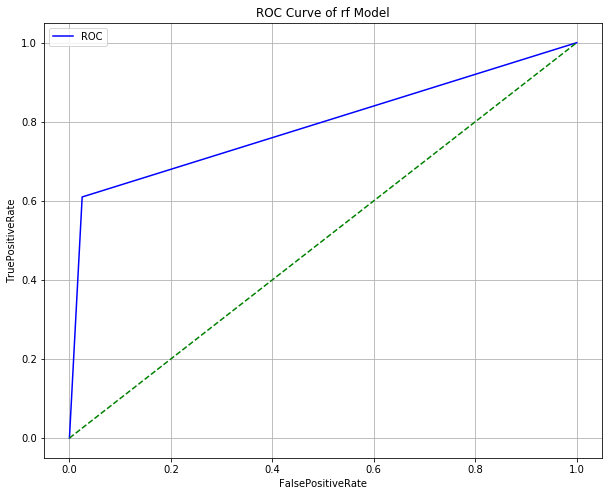

In [72]:
print("ROC_AUC Score :",roc_auc_score(y_test, rf_pred))

fpr,tpr,thresholds=roc_curve(y_test, rf_pred)
plt.figure(figsize=(10,8),)
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.title('ROC Curve of rf Model')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid()
plt.legend()
plt.show